# Ideal Customer Profile (ICP)

## Understand Data

In [45]:
import pandas as pd
df = pd.read_csv("/content/E-commerce Customer.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [2]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [3]:
df.shape

(350, 11)

In [46]:
print(df.isna().sum())
print(df.duplicated().sum())

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64
0


In [47]:
df = df.drop_duplicates()
df=df.dropna()
df.shape

(348, 11)

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    object 
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    object 
 4   Membership Type           348 non-null    object 
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    bool   
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 30.2+ KB


In [7]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [ ]:
# Age: > 37 --> outlier
# Total Spend: < 1160 or > 410 --> outlier
# Items Purchased: < 9 or > 15 --> outlier
# Average Rating: < 3.5 or > 4.5 --> outlier
# Days Since Last Purchase: < 15 or > 38 --> outlier

In [48]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate through each categorical column and print value counts
for col in categorical_columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 50)


Value counts for column: Gender
Gender
Male      175
Female    173
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: City
City
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          56
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Membership Type
Membership Type
Gold      117
Silver    117
Bronze    114
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Satisfaction Level
Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
# its balance data!!!

## preprocessing

In [49]:
# mapping

# Mapping for Gender: Female = 1, Male = 0
gender_map = {'Female': 1, 'Male': 0}
df['Gender'] = df['Gender'].map(gender_map)

# Mapping for Membership Type
membership_map = {'Gold': 5, 'Silver': 3, 'Bronze': 1}
df['Membership Type'] = df['Membership Type'].map(membership_map)

# Mapping for Satisfaction Level
satisfaction_map = {'Satisfied': 1, 'Unsatisfied': -1, 'Neutral': 0}
df['Satisfaction Level'] = df['Satisfaction Level'].map(satisfaction_map)

# map	Discount Applied
discount_map = {True: 1, False: 0}
df['Discount Applied'] = df['Discount Applied'].map(discount_map)

# map city
city_map = {
    'Houston': 1,        # Lowest activity
    'Miami': 2,
    'San Francisco': 3,
    'Chicago': 4,
    'Los Angeles': 5,
    'New York': 6        # Highest activity
}

# Apply the map to the 'City' column
df['City'] = df['City'].map(city_map)

df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,1,29,6,5,1120.20,14,4.6,1,25,1
1,102,0,34,5,3,780.50,11,4.1,0,18,0
2,103,1,43,4,1,510.75,9,3.4,1,42,-1
3,104,0,30,3,5,1480.30,19,4.7,0,12,1
4,105,0,27,2,3,720.40,13,4.0,1,55,-1


### Customer segmantation
- demographics : 'Gender', 'Age', 'City'
- behavioral : 'Membership Type', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase', 'Satisfaction Level'

In [50]:
# the cluster will be as a group by for those input feature
# Input conditions for segmentation Sample



# input_gender = ['Male', 'Female']  # Use one or both genders
# input_age_range = (25, 35)  # Specify age range (min_age, max_age)
# input_cities = ['New York', 'Chicago']  # One or more cities

# # Filter based on conditions
# segmented_customers = df[
#     (df['Gender'].isin(input_gender)) &
#     (df['Age'].between(input_age_range[0], input_age_range[1])) &
#     (df['City'].isin(input_cities))
# ]

### Purchase Likelihood Prediction

In [51]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [52]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,1,29,6,5,1120.20,14,4.6,1,25,1
1,102,0,34,5,3,780.50,11,4.1,0,18,0
2,103,1,43,4,1,510.75,9,3.4,1,42,-1
3,104,0,30,3,5,1480.30,19,4.7,0,12,1
4,105,0,27,2,3,720.40,13,4.0,1,55,-1


Adjusted price: 630.0
Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        50

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

XGBoost Accuracy: 1.0
XGBoost F1 Score: 1.0
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        50

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Top customers based on XGBoost:
     Customer ID  XGB_Prediction  XGB_Probability
0            101               1         0.995003
297          398      

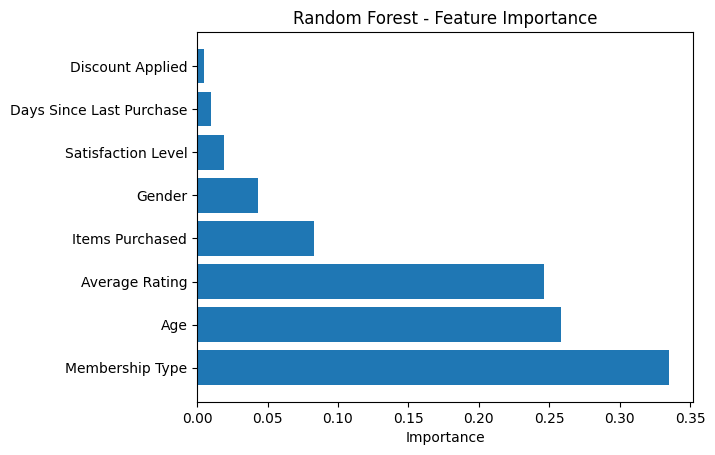

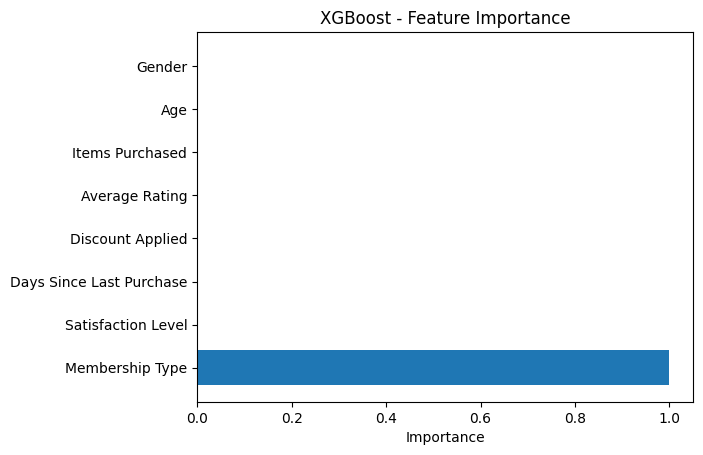

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt

# Step 1: Input the product price with a multiplier (adjusting price downward)
product_price = 700  # Example product price
price_multiplier = 0.1
adjusted_price = product_price - (product_price * price_multiplier)  # Adjust price downward

print("Adjusted price:", adjusted_price)  # For debugging, this will print 900

# Step 2: Increase the slice of customers who can potentially afford the product
# Define a threshold for high potential customers based on the adjusted price
df['Target'] = np.where(df['Total Spend'] > adjusted_price, 1, 0)

# Step 3: Define features and target
features = ['Gender', 'Age', 'Membership Type', 'Items Purchased',
            'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']
target = 'Target'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply StandardScaler to numerical features
scaler = StandardScaler()

# Note: Only numerical features are scaled, fit the scaler on the training data
numeric_features = ['Age', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase', 'Satisfaction Level']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# ---- Random Forest Model ----
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# ---- XGBoost Model ----
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Step 5: Apply the Random Forest model to the entire DataFrame to get predictions and probabilities
df[numeric_features] = scaler.transform(df[numeric_features])  # Apply scaling to full dataset before inference
df['RF_Prediction'] = rf_model.predict(X)  # Predict 0 or 1 with Random Forest
df['RF_Probability'] = rf_model.predict_proba(X)[:, 1]  # Probability of 1 (Random Forest)

# Step 6: Apply the XGBoost model to the entire DataFrame to get predictions and probabilities
df['XGB_Prediction'] = xgb_model.predict(X)  # Predict 0 or 1 with XGBoost
df['XGB_Probability'] = xgb_model.predict_proba(X)[:, 1]  # Probability of 1 (XGBoost)

# Step 7: Sort the DataFrame by XGBoost Probability to rank customers
sorted_customers_xgb = df.sort_values(by='XGB_Probability', ascending=False)

# Show top-ranked customers based on XGBoost
print("Top customers based on XGBoost:")
print(sorted_customers_xgb[['Customer ID', 'XGB_Prediction', 'XGB_Probability']])

# Feature importance for Random Forest
rf_feature_importance = rf_model.feature_importances_
sorted_idx_rf = np.argsort(rf_feature_importance)[::-1]  # Sort in descending order
plt.barh(np.array(features)[sorted_idx_rf], rf_feature_importance[sorted_idx_rf])
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.show()

# Feature importance for XGBoost
xgb_feature_importance = xgb_model.feature_importances_
sorted_idx_xgb = np.argsort(xgb_feature_importance)[::-1]  # Sort in descending order
plt.barh(np.array(features)[sorted_idx_xgb], xgb_feature_importance[sorted_idx_xgb])
plt.title("XGBoost - Feature Importance")
plt.xlabel("Importance")
plt.show()


In [55]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Target,RF_Prediction,RF_Probability,XGB_Prediction,XGB_Probability
0,101,1,-0.944676,6,5,1120.20,0.364671,1.028450,1,-0.165301,1.182428,1,1,0.86,1,0.995003
1,102,0,0.064624,5,3,780.50,-0.373523,0.162059,0,-0.689201,-0.008568,1,1,0.82,1,0.995003
2,103,1,1.881365,4,1,510.75,-0.865652,-1.050889,1,1.107029,-1.199564,0,0,0.39,0,0.009781
3,104,0,-0.742816,3,5,1480.30,1.594995,1.201729,0,-1.138258,1.182428,1,1,0.93,1,0.995003
4,105,0,-1.348396,2,3,720.40,0.118607,-0.011219,1,2.079987,-1.199564,1,1,0.82,1,0.995003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,0,-0.339096,2,3,660.30,-0.619587,-0.357776,1,1.107029,-1.199564,1,1,0.82,1,0.995003
346,447,1,0.468344,1,1,470.50,-1.111717,-1.744003,0,-0.015615,-0.008568,0,0,0.39,0,0.009781
347,448,1,-0.742816,6,5,1190.80,0.856801,0.855172,1,0.059228,1.182428,1,1,0.86,1,0.995003
348,449,0,0.064624,5,3,780.20,-0.373523,0.335337,0,-0.464672,-0.008568,1,1,0.82,1,0.995003


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
import joblib  # For saving and loading the models

# Step 1: Input the product price with a multiplier (adjusting price downward)
product_price = 1000  # Example product price
price_multiplier = 0.1
adjusted_price = product_price - (product_price * price_multiplier)  # Adjust price downward

print("Adjusted price:", adjusted_price)

# Step 2: Increase the slice of customers who can potentially afford the product
df['Target'] = np.where(df['Total Spend'] > adjusted_price, 1, 0)

# Step 3: Define features and target
features = ['Gender', 'Age', 'Membership Type', 'Items Purchased',
            'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']
target = 'Target'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply StandardScaler to numerical features
scaler = StandardScaler()
numeric_features = ['Age', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase', 'Satisfaction Level']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# ---- Train Random Forest Model ----
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 5: Save the Scaler and Random Forest Model
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler
joblib.dump(rf_model, 'rf_model.pkl')  # Save the Random Forest model

print("Scaler and Random Forest model saved successfully.")

# ---- Example of Loading the Scaler and RF Model ----
# To load and use these in the future:
loaded_scaler = joblib.load('scaler.pkl')
loaded_rf_model = joblib.load('rf_model.pkl')

# Now you can use loaded_scaler and loaded_rf_model to make predictions
